In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [52]:
library(tidyverse)

In [ ]:
table1

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [ ]:
table4a

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


`tidy format `
-  when every feature has its own column
-  each sample has its own row

-----

Advantage of data reshaping / organising OR data in tidy format"
1. Consistent way of storing data
2. Many R-functions works on tidy data
3. R-functions work well with vectorised data which comes from data in tidy format


In [ ]:
table1

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
# rate of cases per 10,000 people
table1 %>% mutate(rate  = (cases / population)*10000)

country,year,cases,population,rate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [ ]:
# number of cases per year
table1 %>% count(year, wt = cases) # wt means 'with respect to'

year,n
<dbl>,<dbl>
1999,250740
2000,296920


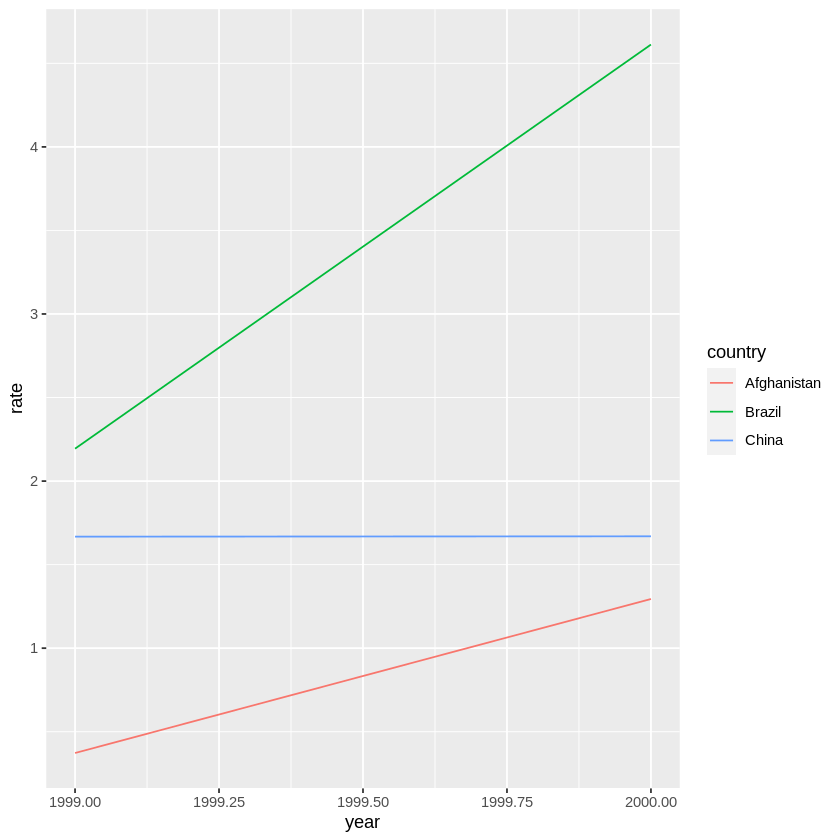

In [ ]:
# plotting the data
ggplot(data = table1 %>% mutate(rate  = (cases / population)*10000), aes(x = year,y = rate)) +
  geom_line(aes(color = country))

spread()

In [ ]:
# selecting year, country and popultaion, and
# turn the long dataframe into a wide one
table1 %>% select(year, country, population)
table1 %>% select(year, country, population) %>% spread(key = country, value = population)

year,country,population
<dbl>,<chr>,<dbl>
1999,Afghanistan,19987071
2000,Afghanistan,20595360
1999,Brazil,172006362
2000,Brazil,174504898
1999,China,1272915272
2000,China,1280428583


year,Afghanistan,Brazil,China
<dbl>,<dbl>,<dbl>,<dbl>
1999,19987071,172006362,1272915272
2000,20595360,174504898,1280428583


In [ ]:
# selecting year, country and cases, and
# turn the long dataframe into a wide one
table1 %>% mutate(rate = (cases/population) * 10000) %>% select(year, country, rate) %>% spread(key = country, value = rate)

year,Afghanistan,Brazil,China
<dbl>,<dbl>,<dbl>,<dbl>
1999,0.372741,2.193930,1.667495
2000,1.294466,4.612363,1.669488


In [ ]:
# create a new dataframe
table_wide = table1 %>%filter(!is.na(cases)) %>% mutate(rate = (cases/population) * 10000) %>% select(year, country, rate) %>% spread(key = country, value = rate)
head(table_wide)

year,Afghanistan,Brazil,China
<dbl>,<dbl>,<dbl>,<dbl>
1999,0.372741,2.193930,1.667495
2000,1.294466,4.612363,1.669488


gather()

In [ ]:
# converting a wide dataframe intoa long one
table_wide %>% gather(key = country, value = rate, -year) # for '-year': minus sign means 'do not gather'

year,country,rate
<dbl>,<chr>,<dbl>
1999,Afghanistan,0.372741
2000,Afghanistan,1.294466
1999,Brazil,2.193930
2000,Brazil,4.612363
1999,China,1.667495
2000,China,1.669488


In [53]:
file = "/content/mtcars.csv"
carData = read.csv(file,header = TRUE,  row.names = 1,
stringsAsFactors = FALSE)
head(carData)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


write / export data

In [57]:
# exporting data
write_csv(table_wide, file = 'tablewide.csv')